In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
from textblob import TextBlob

In [18]:
df= pd.read_csv('Social_Data.csv')

In [30]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [32]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df.columns = col_names
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71981 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71981 non-null  int64 
 1   Entity     71981 non-null  object
 2   Sentiment  71981 non-null  object
 3   Content    71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [34]:
df.columns

Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [35]:
missing_values = df.isnull().sum()
print("Missing values:", missing_values)

Missing values: ID             0
Entity         0
Sentiment      0
Content      326
dtype: int64


In [36]:
missing_values_after_drop = df.isnull().sum()
print("Missing values after dropping:", missing_values_after_drop)

Missing values after dropping: ID             0
Entity         0
Sentiment      0
Content      326
dtype: int64


In [37]:
duplicate_count_before = df.duplicated().sum()
print("Duplicate rows before removal:", duplicate_count_before)

df.drop_duplicates(inplace=True)

duplicate_count_after = df.duplicated().sum()
print("Duplicate rows after removal:", duplicate_count_after)

Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [38]:
cleaned_df_shape = df.shape
print("DataFrame shape after cleaning:", cleaned_df_shape)

DataFrame shape after cleaning: (71981, 4)


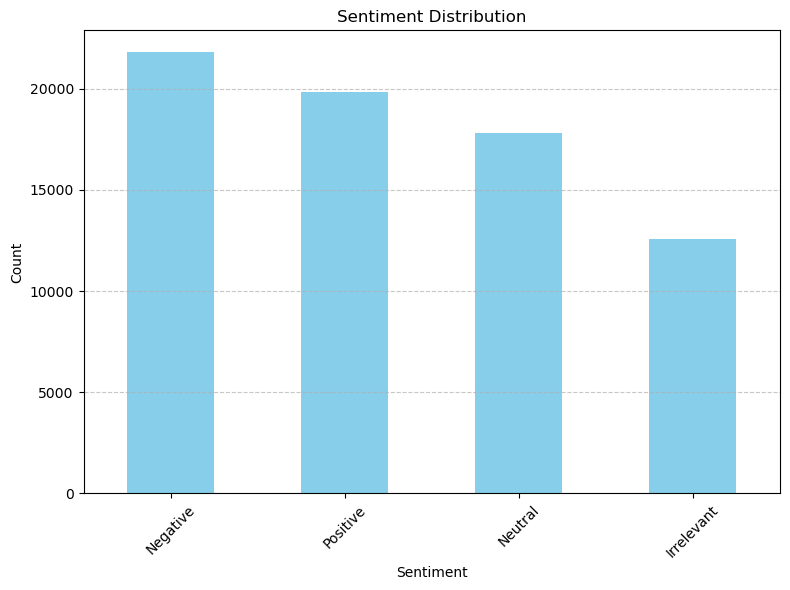

In [49]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

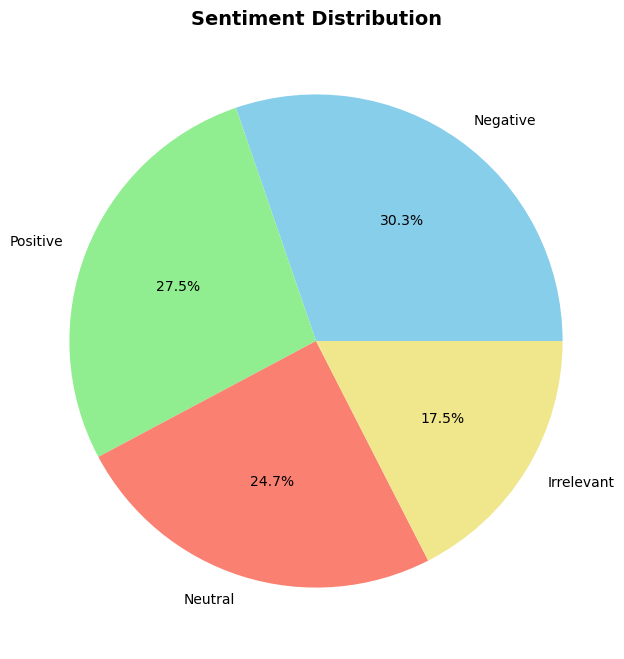

In [40]:
plt.figure(figsize=(7, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon', 'khaki'])
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

In [41]:
G = nx.DiGraph()

In [42]:
for index, row in df.iterrows():
    entity = row['Entity']
    sentiment = row['Sentiment']
    G.add_edge(entity, sentiment)

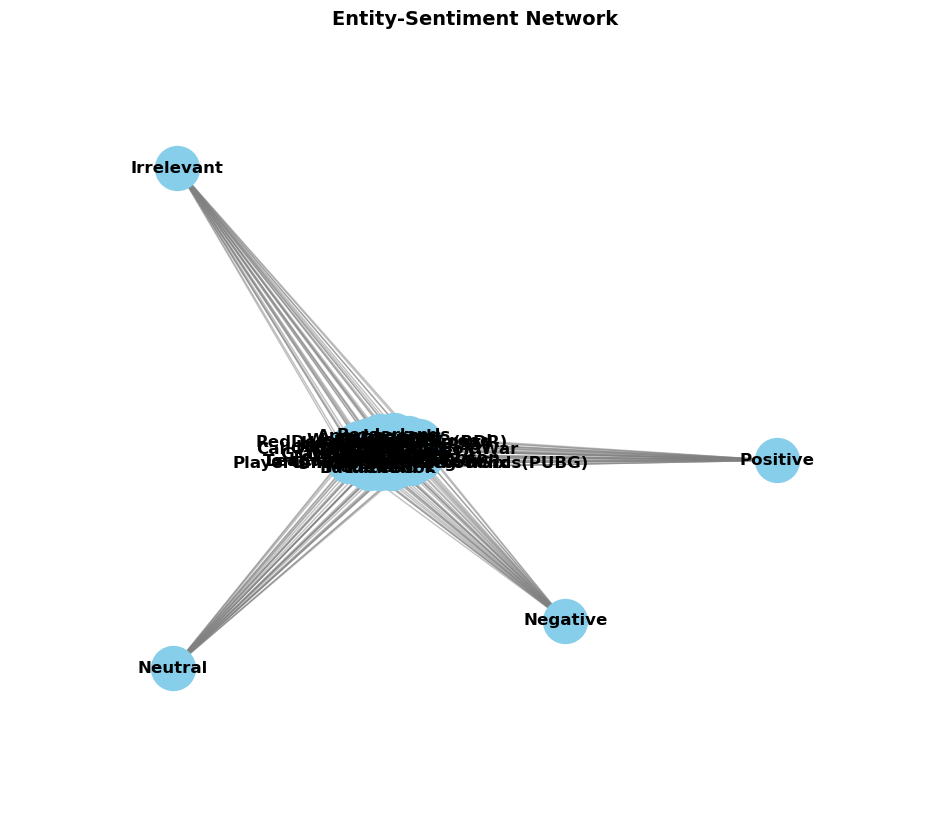

In [50]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_weight='bold', font_color='black')
plt.title('Entity-Sentiment Network', fontsize=14, fontweight='bold')
plt.margins(0.2, 0.2)
plt.axis('off')
plt.show()

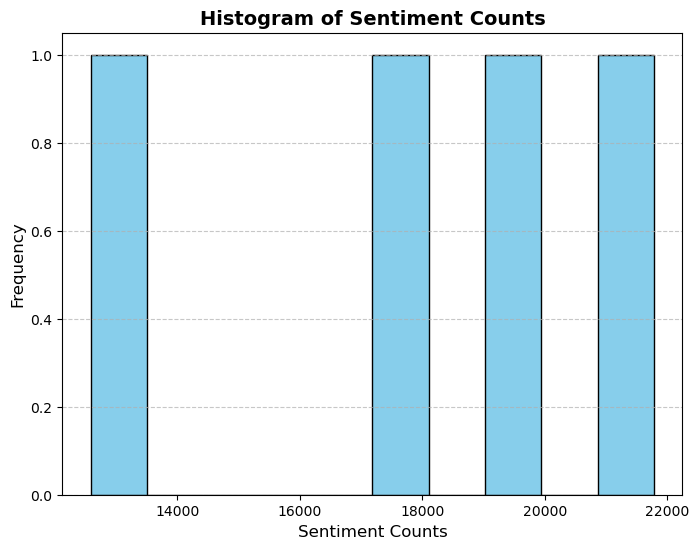

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(sentiment_counts, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Counts', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

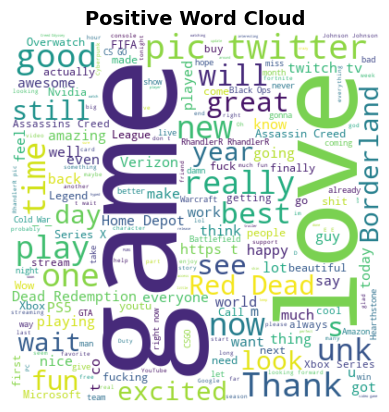

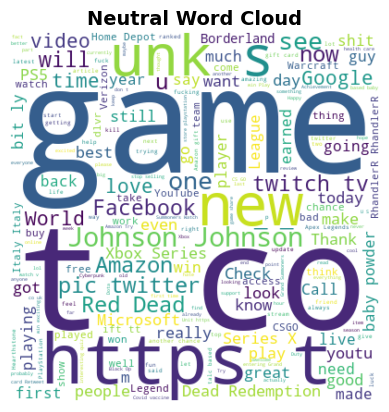

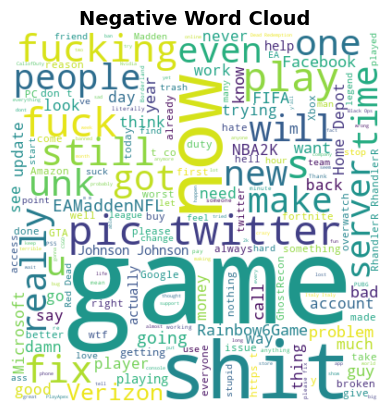

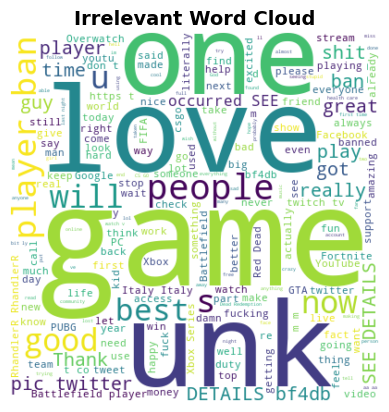

In [53]:
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
    # Filter rows where 'Sentiment' matches the current sentiment
    sentiment_rows = df[df['Sentiment'] == sentiment]
    
    # Join 'Content' values after converting them to strings, handling potential NaN values
    text = ' '.join(sentiment_rows['Content'].astype(str))
    
    # Generate word cloud only if there's text data
    if text:
        wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(sentiment + ' Word Cloud', fontsize=14, fontweight='bold')
        plt.axis('off')
        plt.show()
    else:
        print(f"No text data found for sentiment: {sentiment}")


In [60]:
def get_sentiment(text):
    # Fill missing values with an empty string
    if pd.isnull(text):
        text = ''
    analysis = TextBlob(str(text))  # Ensure text is converted to string
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the get_sentiment function to the 'Content' column
df['Sentiment'] = df['Content'].apply(get_sentiment)


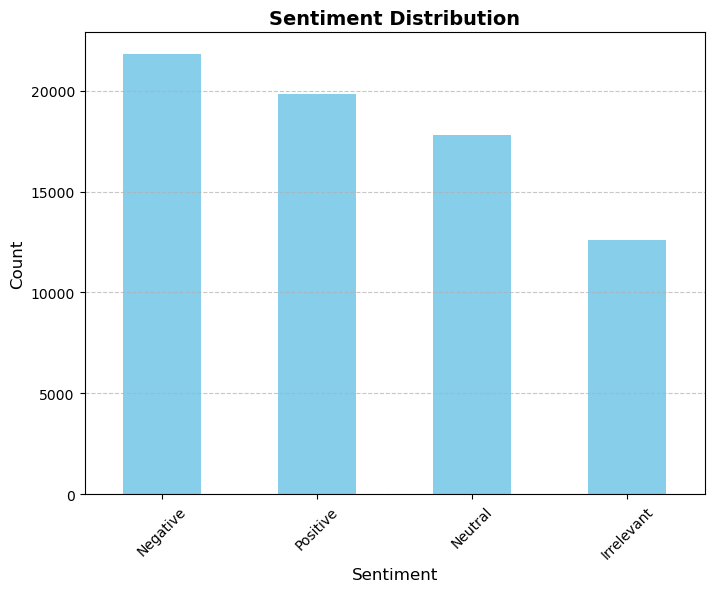

In [62]:
# Plot the sentiment counts after sentiment analysis
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
